# Hyperexp varimpo

In [ ]:
import math
p = [.1, .9]
lmd = [2.0,2.5]

mean = 0
mean_squared = 0
for i in range(0,len(lmd)):
  mean += p[i]/lmd[i]
  mean_squared += (2*p[i])/(lmd[i]*lmd[i])

var = mean_squared - mean*mean
cvar = math.sqrt(var)/mean
print('mean',mean)
print('var',var)
print('var_alt',2*math.sqrt(p[0]*p[1])*(1/lmd[0] + 1/lmd[1]))
print('cvar',cvar)

p_hat = .5 * (1 - math.sqrt((cvar*cvar - 1)/(cvar*cvar +1)))
lmd1_hat = 2*p[0]
lmd2_hat = 2*p[1]

print('p_hat',p_hat)
print('lmd1_hat',lmd1_hat)
print('lmd2_hat',lmd2_hat)



mean 0.41
var 0.16990000000000005
var_alt 0.5400000000000001
cvar 1.005339699781705
p_hat 0.4635121808442104
lmd1_hat 0.2
lmd2_hat 1.8


# Param gen

In [4]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def gen(min,max):
    return round(np.random.uniform(min,max),4)

In [3]:
params = []

for i in range(0,100):
    p = gen(0,1)
    l1 = gen(2.0,7.0)
    l2 = gen(0.001,5.0)

    mean_inp = round(p/l1 + (1.0-p)/l2,4)
    mean_sq_inp = (2*p)/(l1*l1) + (2*(1-p))/(l2*l2)
    var_inp = mean_sq_inp - mean_inp*mean_inp
    cvar_inp = math.sqrt(var_inp)/mean_inp

    mu1 = gen(mean_inp,mean_inp+5.0)
    alpha = gen(0,5.0)
    mu2 = gen(0,5.0)
    sigma = gen(0.001,2)

    prm = {
        'p':p,
        'l1':l1,
        'l2':l2,
        'mu1':mu1,
        'mu2':mu2,
        'alpha':alpha,
        'sigma':sigma,
        'cvar':cvar_inp,
    }
    params.append(prm)


In [4]:
df = pd.DataFrame(params)

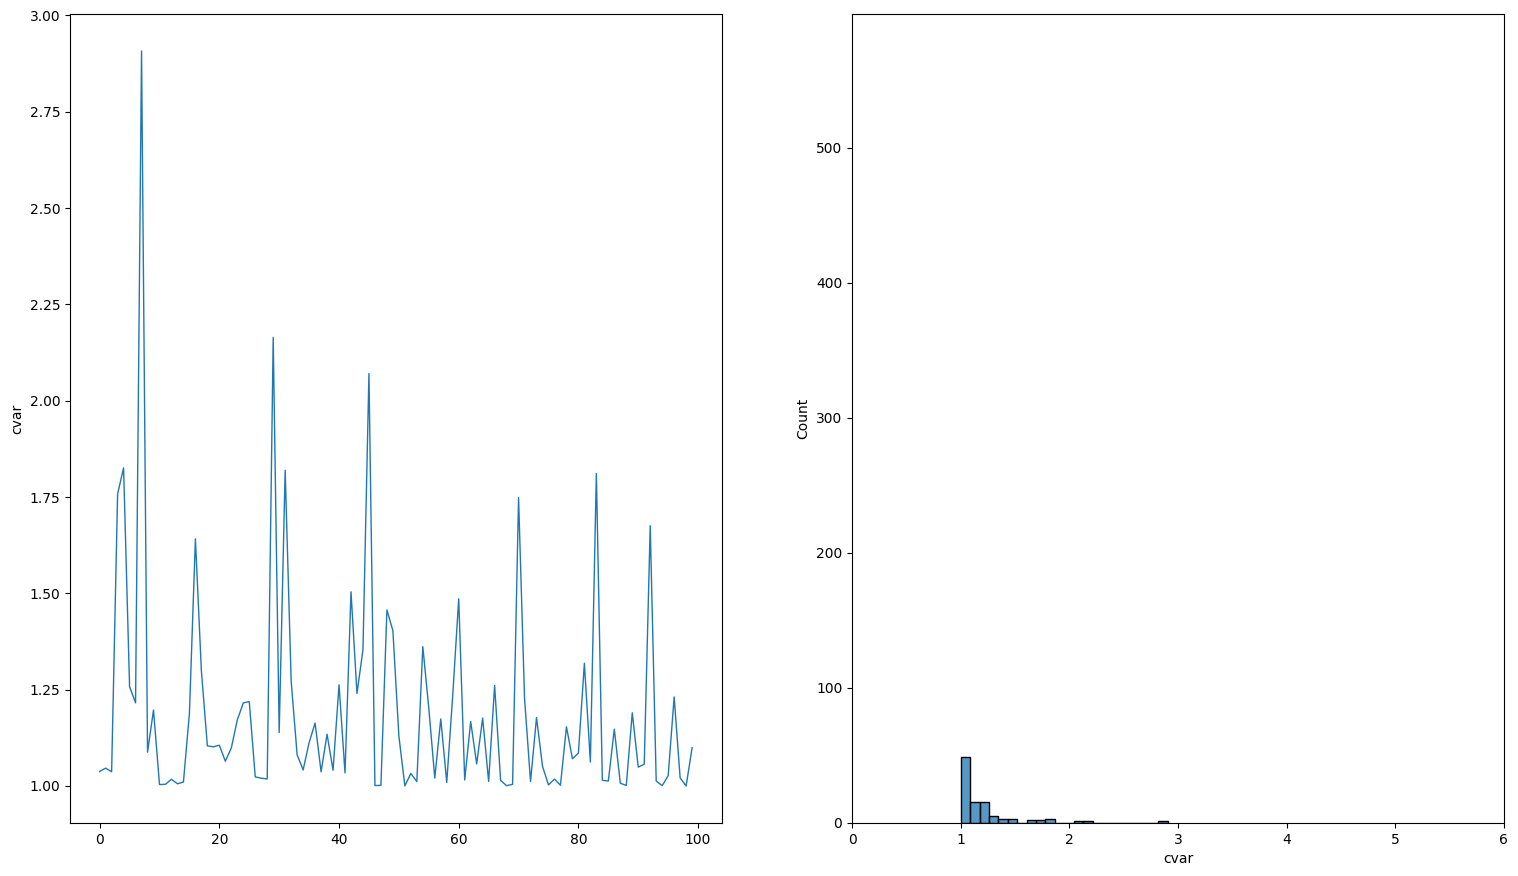

In [5]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)
sns.lineplot( data=df['cvar'],lw=1,legend=False,ax=ax[0])
sns.histplot( data=df['cvar'],lw=1,legend=False,ax=ax[1])
ax[1].set_xlim(0, 6)
ax[1].set_ylim(0, 599)
plt.show()

In [ ]:
import subprocess
import json
import numpy as np
res = []
procs = []


completed_count = 0
m_index = 0
for p in params:
    procs.append(subprocess.Popen(' '.join(['python','run_h.py',str(p['p']),str(p['l1']),str(p['l2']),str(p['sigma']),str(p['mu1'])]),shell=True))
    m_index +=1
    if m_index>100:
        procs[0].wait()
        m_index-=1
        procs.pop(0)
        completed_count+=1
        print(f'Completed: {completed_count}',end="\r",flush=True)


for p in procs:
    p.wait()
    completed_count+=1
    print(f'Completed: {completed_count}',end="\r",flush=True)

In [5]:
res = []
from os import listdir
import json
from os.path import isfile, join
for f in [f for f in listdir('results/') if isfile(join('results/', f))]:
    with open(f'results/{f}','r',encoding='utf-8') as ff:
        res.append(json.load(ff))

In [6]:
df_res = pd.DataFrame(res)

In [7]:
df_res

,input_intensity,orbit_intesity,node_intensity,os_distr,os_mean,os_std,os_var,os_q95,os_q99,wt_distr,wt_bins,wt_mean,wt_std,wt_var,wt_q95,wt_q99
0,"[0.3049, 4.0148, 2.2068]",0.0268,3.8451,"[3.2788871701422916e-05, 1.616199730987578e-05...",447.084954,65.587858,0.146701,421.0,444.0,"[0.1817317293519091, 0.0036850363748751843, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",173.991754,206.432828,1.186452,588.040923,909.167886
1,"[0.2013, 6.7578, 0.7113]",0.5481,1.7738,"[0.0374522096601307, 0.08044395222246854, 0.11...",5.519534,3.746900,0.678844,NaN,0.0,"[0.3213962605548854, 0.08074487334137515, 0.07...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",6.334744,8.214601,1.296753,22.658046,37.442665
2,"[0.5655, 5.2779, 0.498]",0.5944,4.8691,"[0.1569680459401109, 0.16856463837071342, 0.16...",3.371735,3.183273,0.944105,NaN,10.0,"[0.4828197738860563, 0.09953447129239637, 0.08...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3.081311,4.562052,1.480556,12.505389,20.752960
3,"[0.4139, 5.9419, 2.1615]",1.9576,5.0043,"[0.03330963674264454, 0.0605351535682209, 0.07...",7.617585,5.647754,0.741410,NaN,11.0,"[0.41024814002494303, 0.1572485270717757, 0.11...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2.705662,3.475885,1.284671,9.576809,15.895096
4,"[0.1375, 3.4403, 2.4174]",0.9047,4.1502,"[0.0037564853038559733, 0.008096529785686653, ...",12.265176,6.444611,0.525440,NaN,15.0,"[0.31944130429321477, 0.1078955962519155, 0.08...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",4.982531,6.302492,1.264918,17.535029,28.510540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"[0.5251, 2.4107, 0.8527]",1.4776,4.8030,"[0.2840949330320224, 0.23260499011554148, 0.17...",1.995985,2.128565,1.066423,NaN,10.0,"[0.5387839359439509, 0.15501063430501688, 0.10...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1.674586,2.283500,1.363621,6.355448,10.236191
60,"[0.1241, 3.6124, 0.3662]",1.9455,2.7896,"[0.6911798676407322, 0.20473506911598666, 0.06...",0.463245,0.838994,1.811122,NaN,NaN,"[0.6073853989813243, 0.16999151103565366, 0.09...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1.258014,1.763430,1.401757,4.723366,8.005586
61,"[0.2107, 5.4496, 2.983]",1.8014,4.7364,"[0.006517790691033664, 0.01744706422524744, 0....",12.139741,7.433510,0.612329,49.0,4.0,"[0.33310787342558906, 0.14072354349852842, 0.1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3.839220,4.766506,1.241530,13.450411,21.901704
62,"[0.0286, 3.2894, 3.0575]",1.7852,3.2692,"[0.0009959990732791894, 0.0016918191783489782,...",48.429059,28.407489,0.586579,15.0,31.0,"[0.11190767616716209, 0.05997552019583843, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",16.364845,20.541341,1.255211,57.163721,98.830696


In [8]:
from scipy import interpolate

def inttp(row):
    #dd = json.loads(row['os_distr'])
    #q = json.loads(row['os_q95'])[1]
    dd = row['os_distr']
    q = row['os_q95']
    f = interpolate.interp1d( dd,list(range(0,len(dd))), fill_value='extrapolate')
    return f(q)

df_res['os_q95'] = df_res.apply(inttp,axis=1)

In [9]:
df_res

,input_intensity,orbit_intesity,node_intensity,os_distr,os_mean,os_std,os_var,os_q95,os_q99,wt_distr,wt_bins,wt_mean,wt_std,wt_var,wt_q95,wt_q99
0,"[0.3049, 4.0148, 2.2068]",0.0268,3.8451,"[3.2788871701422916e-05, 1.616199730987578e-05...",447.084954,65.587858,0.146701,77009356.48809169,444.0,"[0.1817317293519091, 0.0036850363748751843, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",173.991754,206.432828,1.186452,588.040923,909.167886
1,"[0.2013, 6.7578, 0.7113]",0.5481,1.7738,"[0.0374522096601307, 0.08044395222246854, 0.11...",5.519534,3.746900,0.678844,nan,0.0,"[0.3213962605548854, 0.08074487334137515, 0.07...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",6.334744,8.214601,1.296753,22.658046,37.442665
2,"[0.5655, 5.2779, 0.498]",0.5944,4.8691,"[0.1569680459401109, 0.16856463837071342, 0.16...",3.371735,3.183273,0.944105,nan,10.0,"[0.4828197738860563, 0.09953447129239637, 0.08...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3.081311,4.562052,1.480556,12.505389,20.752960
3,"[0.4139, 5.9419, 2.1615]",1.9576,5.0043,"[0.03330963674264454, 0.0605351535682209, 0.07...",7.617585,5.647754,0.741410,nan,11.0,"[0.41024814002494303, 0.1572485270717757, 0.11...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2.705662,3.475885,1.284671,9.576809,15.895096
4,"[0.1375, 3.4403, 2.4174]",0.9047,4.1502,"[0.0037564853038559733, 0.008096529785686653, ...",12.265176,6.444611,0.525440,nan,15.0,"[0.31944130429321477, 0.1078955962519155, 0.08...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",4.982531,6.302492,1.264918,17.535029,28.510540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"[0.5251, 2.4107, 0.8527]",1.4776,4.8030,"[0.2840949330320224, 0.23260499011554148, 0.17...",1.995985,2.128565,1.066423,nan,10.0,"[0.5387839359439509, 0.15501063430501688, 0.10...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1.674586,2.283500,1.363621,6.355448,10.236191
60,"[0.1241, 3.6124, 0.3662]",1.9455,2.7896,"[0.6911798676407322, 0.20473506911598666, 0.06...",0.463245,0.838994,1.811122,nan,NaN,"[0.6073853989813243, 0.16999151103565366, 0.09...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1.258014,1.763430,1.401757,4.723366,8.005586
61,"[0.2107, 5.4496, 2.983]",1.8014,4.7364,"[0.006517790691033664, 0.01744706422524744, 0....",12.139741,7.433510,0.612329,-47004.02511110622,4.0,"[0.33310787342558906, 0.14072354349852842, 0.1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3.839220,4.766506,1.241530,13.450411,21.901704
62,"[0.0286, 3.2894, 3.0575]",1.7852,3.2692,"[0.0009959990732791894, 0.0016918191783489782,...",48.429059,28.407489,0.586579,144595.71646112014,31.0,"[0.11190767616716209, 0.05997552019583843, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",16.364845,20.541341,1.255211,57.163721,98.830696


In [10]:
import warnings
warnings.simplefilter(action='ignore')

In [11]:
orb_dict = {}
for index, row in df_res.iterrows():
    orb_dict[str(index)] = row['os_distr']


df_orbit_size = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in orb_dict.items() ]))


In [12]:
df_orbit_size.describe(percentiles=[0.90,0.95,0.99])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,4.365787e-04,0.001000,1.000000e-03,0.001000,0.001000,0.001000
std,0.002114,0.009093,0.010918,0.007676,0.006725,0.007924,0.002637,0.004881,0.001091,0.007530,...,0.003127,0.003498,0.002757,0.004243,4.467335e-04,0.013656,2.290507e-02,0.006425,0.003207,0.012440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.686566e-08,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000558,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.042309e-04,0.000000,0.000000e+00,0.000000,0.000000,0.000000
90%,0.004816,0.000000,0.000000,0.000000,0.000000,0.000000,0.003761,0.000000,0.002760,0.000000,...,0.001608,0.001925,0.003893,0.000118,1.006972e-03,0.000000,0.000000e+00,0.000000,0.002656,0.000000
95%,0.006462,0.000000,0.000000,0.000000,0.000000,0.000000,0.007543,0.003018,0.003023,0.000000,...,0.009945,0.008885,0.008552,0.005361,1.269145e-03,0.000000,0.000000e+00,0.000189,0.009020,0.000000
99%,0.008132,0.037485,0.014230,0.042529,0.045082,0.042669,0.012440,0.031857,0.003521,0.043962,...,0.014538,0.018645,0.012565,0.024176,2.090485e-03,0.003260,9.628645e-08,0.044849,0.016176,0.020952
max,0.009027,0.118368,0.168565,0.086444,0.066262,0.092716,0.014148,0.035710,0.004265,0.091930,...,0.016622,0.020939,0.014005,0.026986,3.366650e-03,0.284095,6.911799e-01,0.060487,0.019866,0.331024


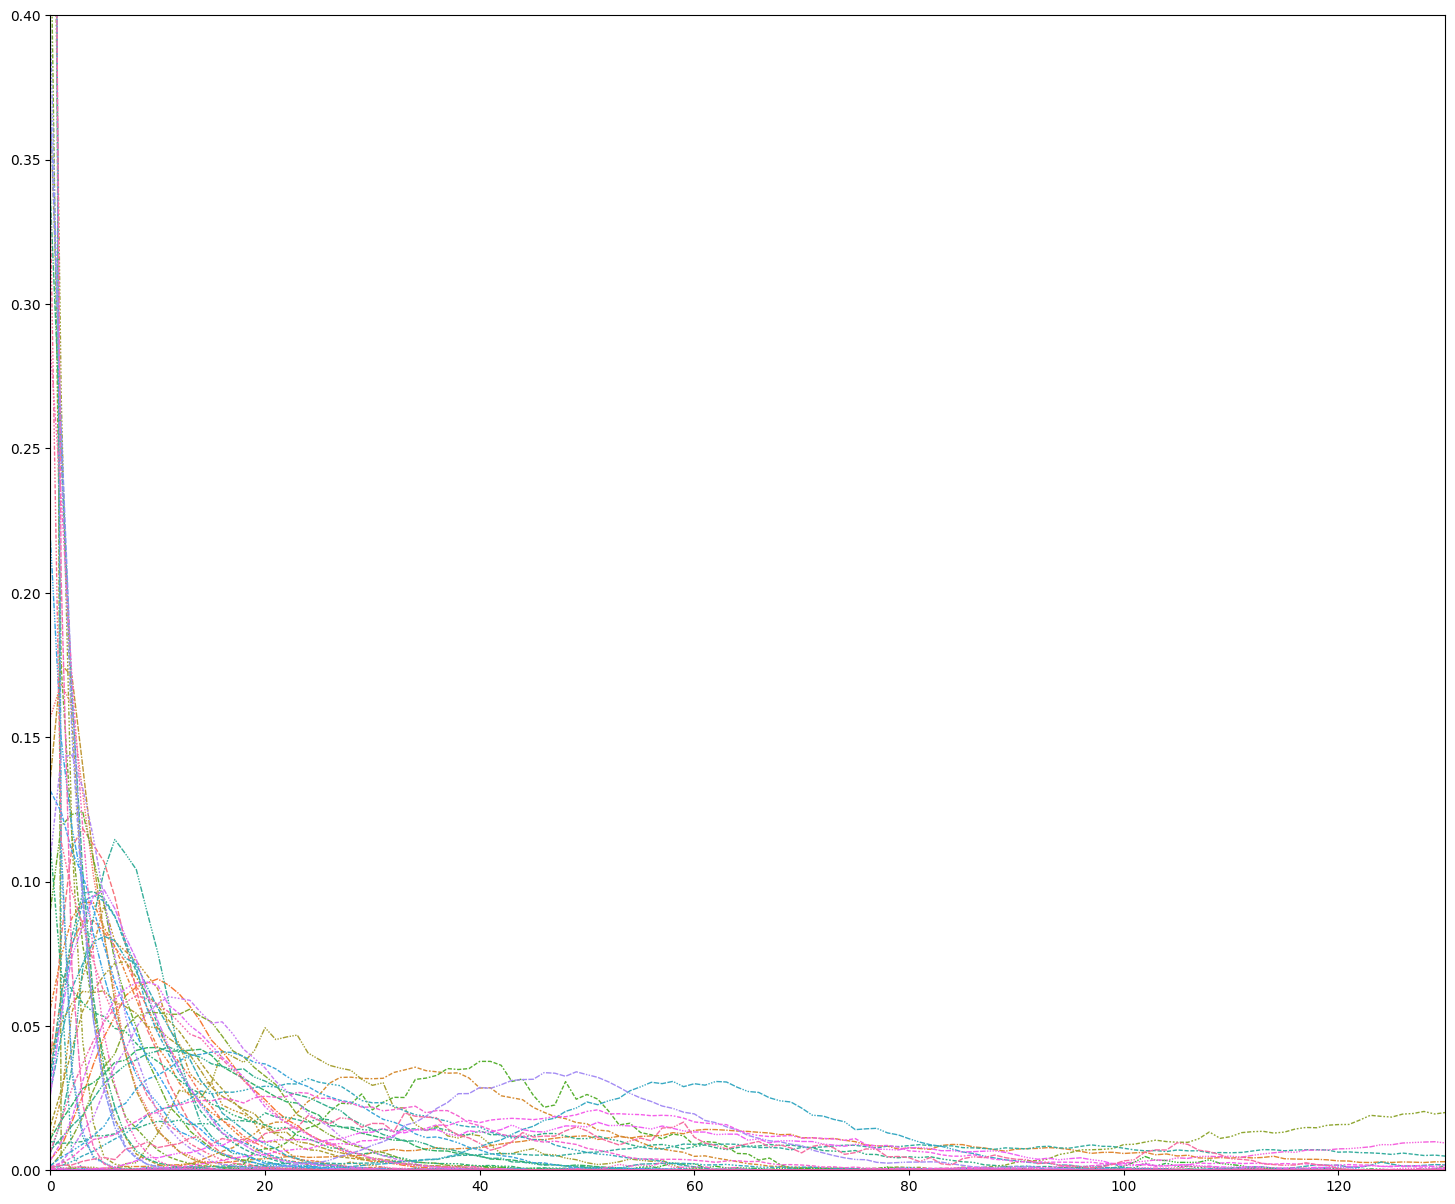

In [13]:
fig, ax = plt.subplots(figsize=(18, 15))
fig = sns.lineplot( data=df_orbit_size,lw=1,legend=False,ax=ax)
ax.set_xlim(0, 130)
ax.set_ylim(0, 0.4)
plt.show()

Распределение времени ожидания

In [14]:
wait_dict = {}
for index, row in df_res.iterrows():
    wait_dict[str(index)] = row['wt_distr']

df_wait_time = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in wait_dict.items() ]))

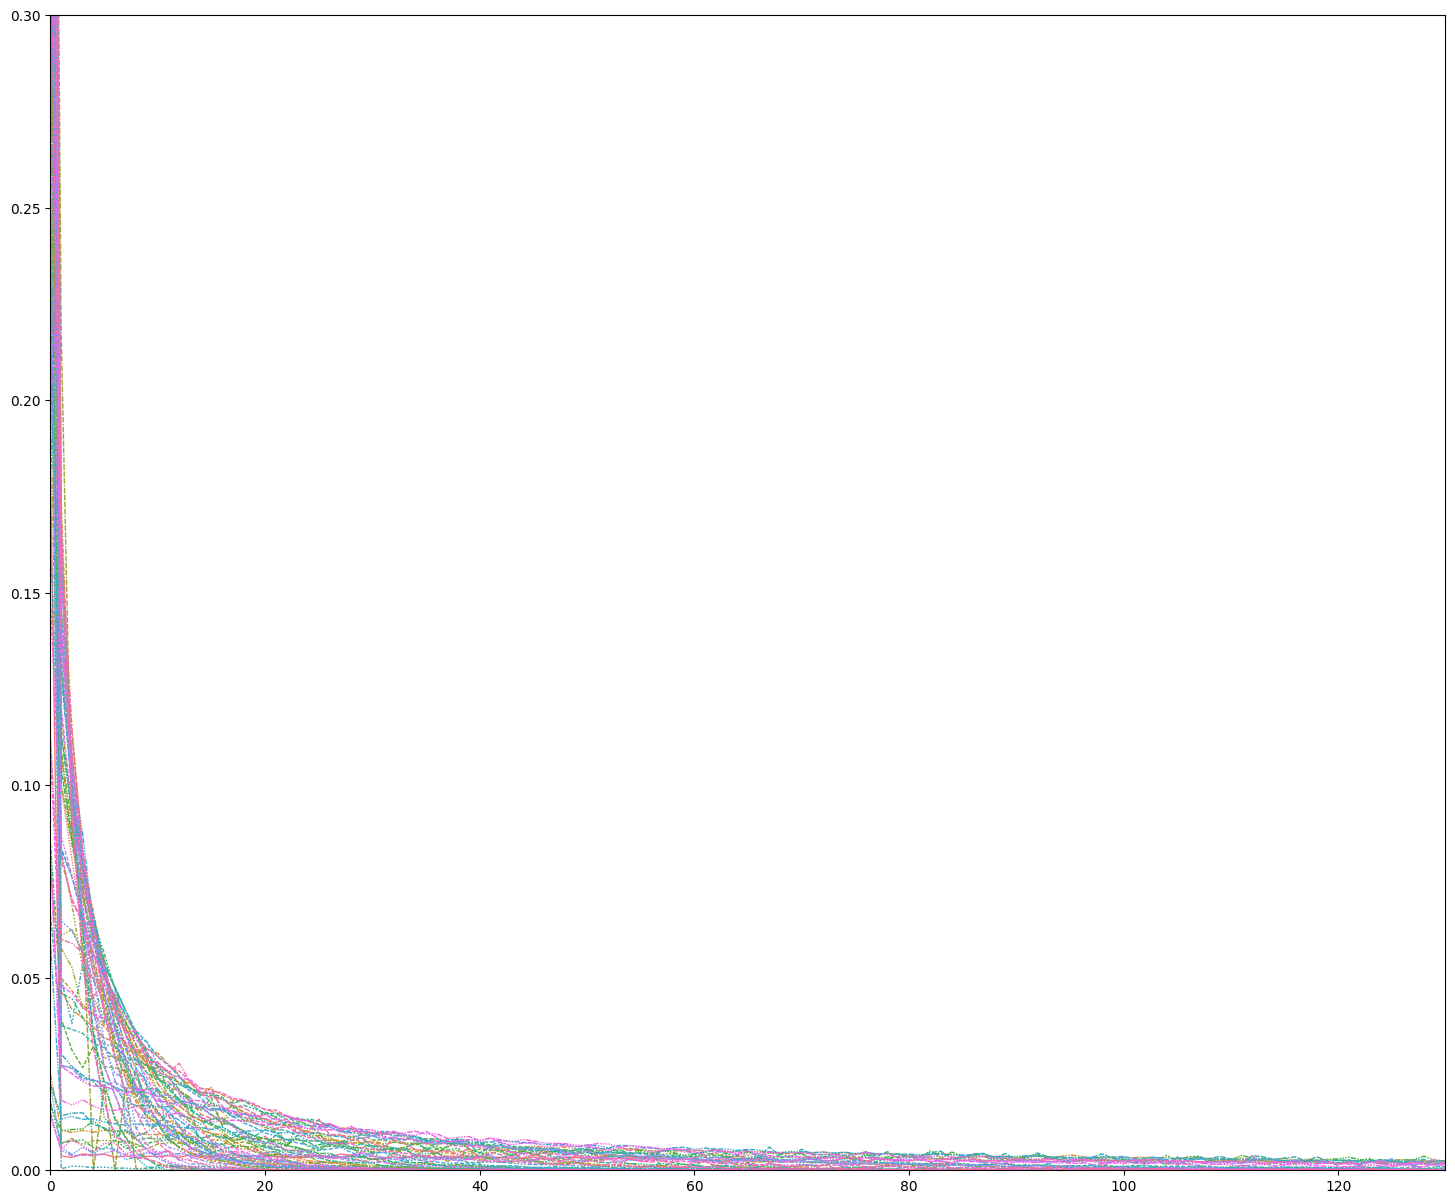

In [15]:
fig, ax = plt.subplots(figsize=(18, 15))
fig = sns.lineplot( data=df_wait_time,lw=1,legend=False,ax=ax)
ax.set_xlim(0, 130)
ax.set_ylim(0, 0.3)
plt.show()

In [16]:
df_scatter =  df_res.select_dtypes(include=['float64','int64'])[[
'os_mean',
'os_std',
#'os_q95',
#'os_q99',
'os_var',
'wt_mean',
'wt_std',
'wt_var',
#'wt_q95',
#'wt_q99',
]]

In [17]:
df_scatter = df_scatter.dropna(axis=0)
df_scatter = df_scatter.reset_index(drop=True)

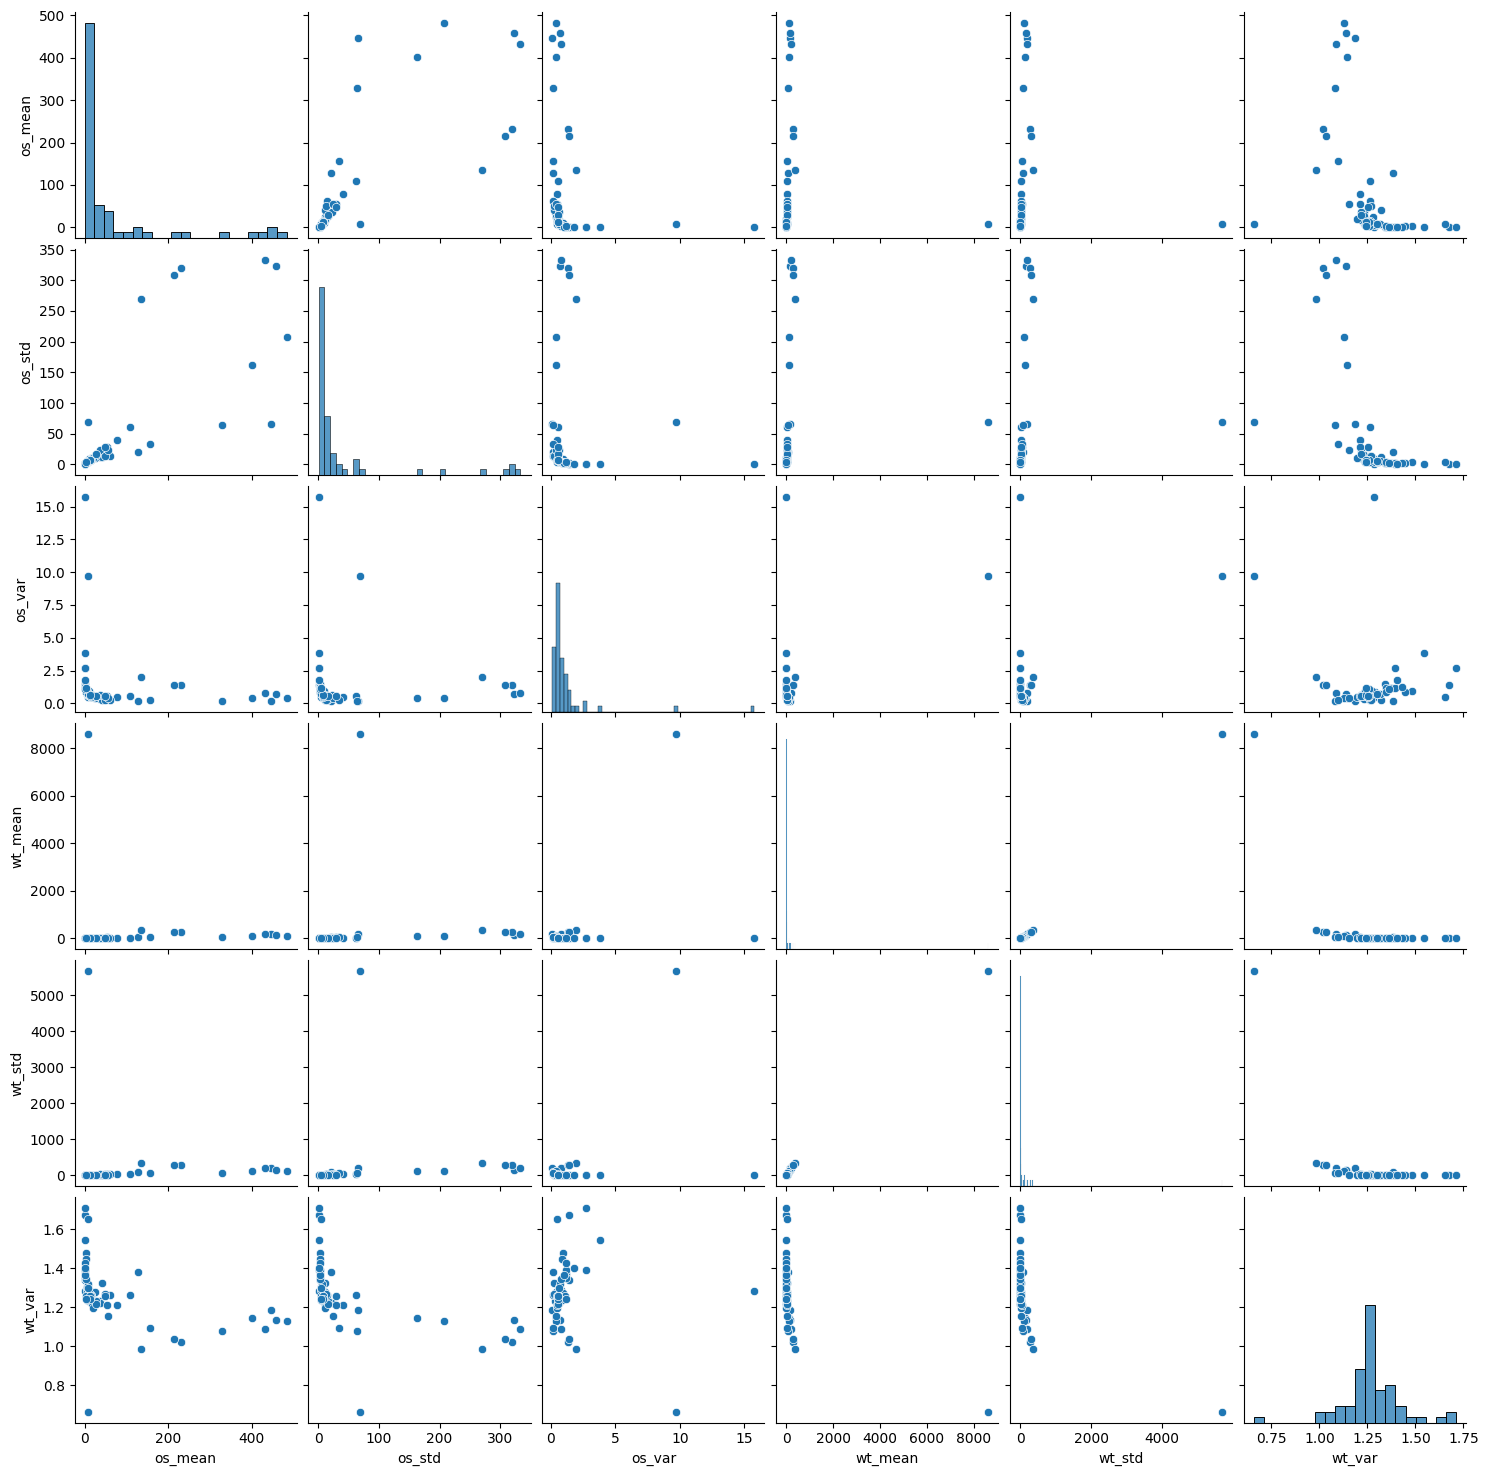

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_scatter)
plt.show()

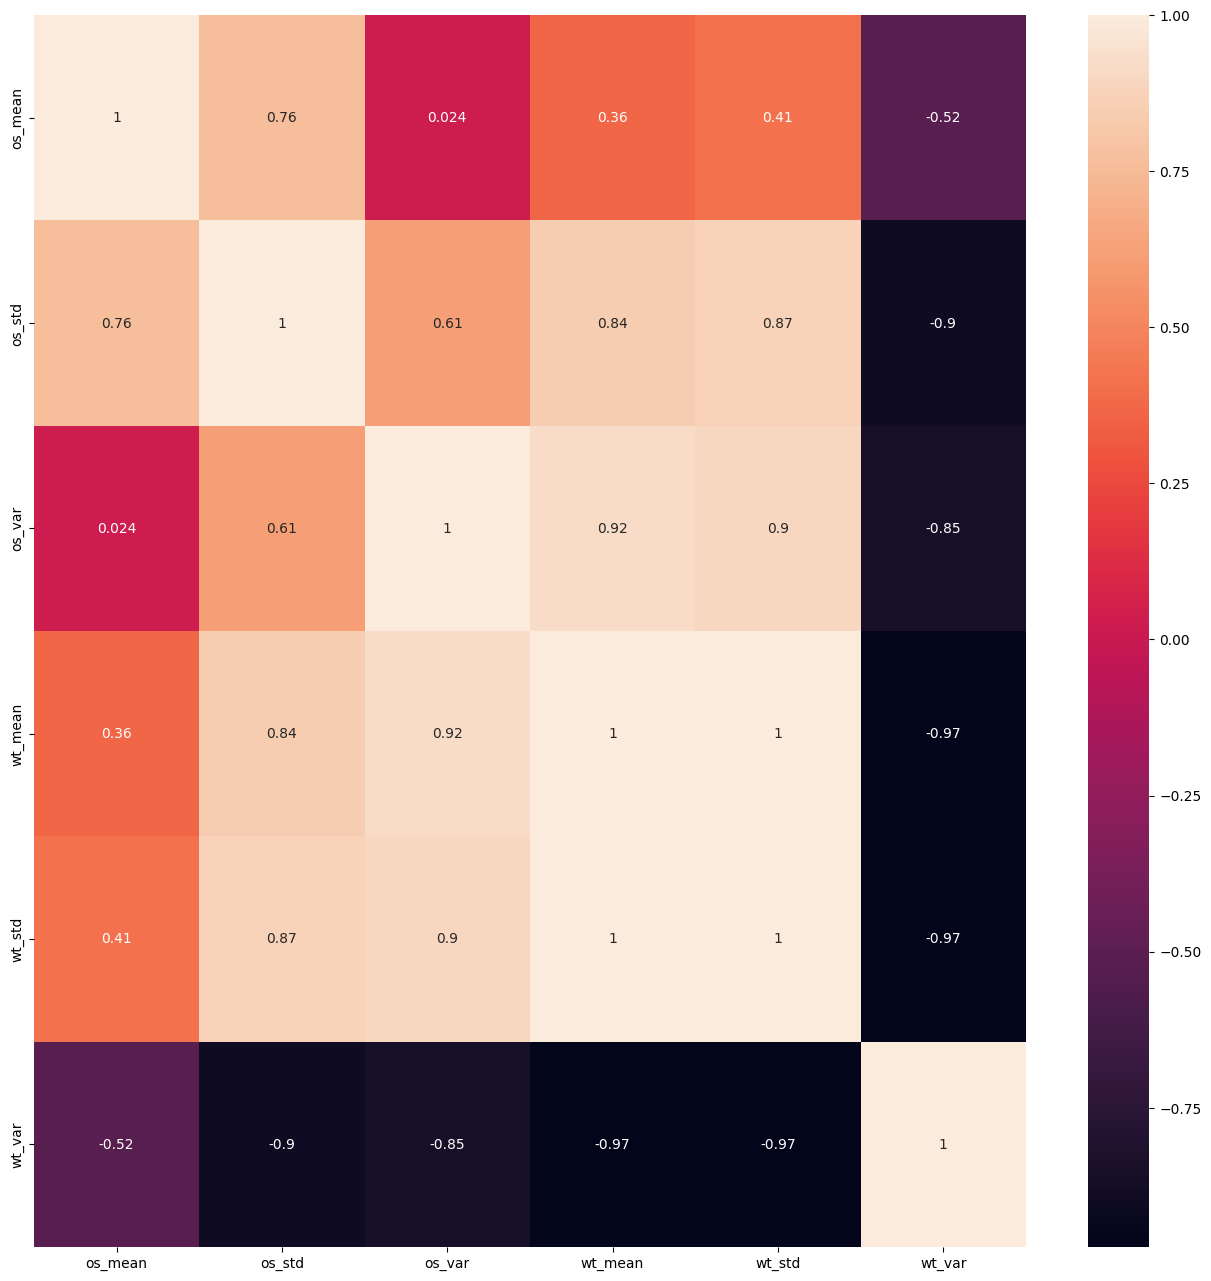

In [32]:
kol_corr_pirson = df_scatter.corr(method='pearson')
plt.figure(figsize = (16,16))
sns.heatmap(kol_corr_pirson[abs(kol_corr_pirson)>0.0], annot = True);